In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

2024-07-21 02:48:16.454484: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-21 02:48:16.454626: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-21 02:48:16.686687: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# **Data Processing**

# Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/train',
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5216 files belonging to 2 classes.


# Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/val',
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 16 files belonging to 2 classes.


# **Building Model**

# Building Convolution Layer

In [4]:
cnn = Sequential([
    Input(shape=[128, 128, 1]),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.45),
    Flatten(),
    Dense(units=256, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compiling and Training Phase

In [5]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='binary_crossentropy',
            metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [6]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 31, 31, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,757,409 (10.52 MB)

 Trainable params: 2,757,409 (10.52 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
training_history = cnn.fit(training_set, epochs=10, validation_data=validation_set)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.7871 - loss: 0.6890 - precision: 0.8435 - recall: 0.8760 - val_accuracy: 0.7500 - val_loss: 0.5716 - val_precision: 0.6667 - val_recall: 1.0000
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.9399 - loss: 0.1517 - precision: 0.9553 - recall: 0.9642 - val_accuracy: 1.0000 - val_loss: 0.1430 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - accuracy: 0.9590 - loss: 0.1104 - precision: 0.9704 - recall: 0.9749 - val_accuracy: 0.6250 - val_loss: 0.8675 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.9702 - loss: 0.0787 - precision: 0.9781 - recall: 0.9818 - val_accuracy: 0.6250 - val_loss: 0.6707 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - accuracy: 0.9794 - loss: 0.0565 - precision: 0.9873 - recall: 0.9850 - val_accuracy: 0.8125 - val_los

# **Evaluating Model**

In [8]:
# Evaluate the model on the training set
train_loss, train_acc, train_precision, train_recall = cnn.evaluate(training_set)
print('Training loss:', train_loss)
print('Training accuracy:', train_acc)
print('Training precision:', train_precision)
print('Training recall:', train_recall)

163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 417ms/step - accuracy: 0.9992 - loss: 0.0066 - precision: 0.9993 - recall: 0.9996
Training loss: 0.0063321092166006565
Training accuracy: 0.9990414381027222
Training precision: 0.9992260336875916
Training recall: 0.9994838833808899


In [9]:
# Explicit unpacking assuming the model was compiled with loss, accuracy, precision, and recall
val_loss, val_acc, val_precision, val_recall = cnn.evaluate(validation_set, verbose=1)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_acc)
print('Validation Precision:', val_precision)
print('Validation Recall:', val_recall)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.9375 - loss: 0.1335 - precision: 0.8889 - recall: 1.0000
Validation Loss: 0.13350720703601837
Validation Accuracy: 0.9375
Validation Precision: 0.8888888955116272
Validation Recall: 1.0


# **Saving Model**

In [10]:
cnn.save('pneumonia_x-ray_model.keras')

In [11]:
# Dcitionary of Training History
training_history.history

{'accuracy': [0.8569785356521606,
  0.9470859169960022,
  0.9622315764427185,
  0.9702837467193604,
  0.9800613522529602,
  0.9821702241897583,
  0.9812116622924805,
  0.9890720844268799,
  0.9900306463241577,
  0.9913727045059204],
 'loss': [0.38266244530677795,
  0.13687124848365784,
  0.10138585418462753,
  0.07612153142690659,
  0.056256528943777084,
  0.05094493553042412,
  0.04795052856206894,
  0.03155870363116264,
  0.028698427602648735,
  0.022510163486003876],
 'precision': [0.8912228345870972,
  0.9631917476654053,
  0.9742135405540466,
  0.9796286821365356,
  0.9878395795822144,
  0.9881259799003601,
  0.9886158108711243,
  0.9927723407745361,
  0.9932903051376343,
  0.9943211078643799],
 'recall': [0.9197419285774231,
  0.9656774401664734,
  0.9749677181243896,
  0.9803870916366577,
  0.9852903485298157,
  0.987870991230011,
  0.9860644936561584,
  0.9925161004066467,
  0.9932903051376343,
  0.9940645098686218],
 'val_accuracy': [0.75,
  1.0,
  0.625,
  0.625,
  0.8125,
  

In [12]:
import json
with open('training_hist.json','w') as training_file:
  json.dump(training_history.history,training_file)

In [13]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'precision', 'recall', 'val_accuracy', 'val_loss', 'val_precision', 'val_recall'])


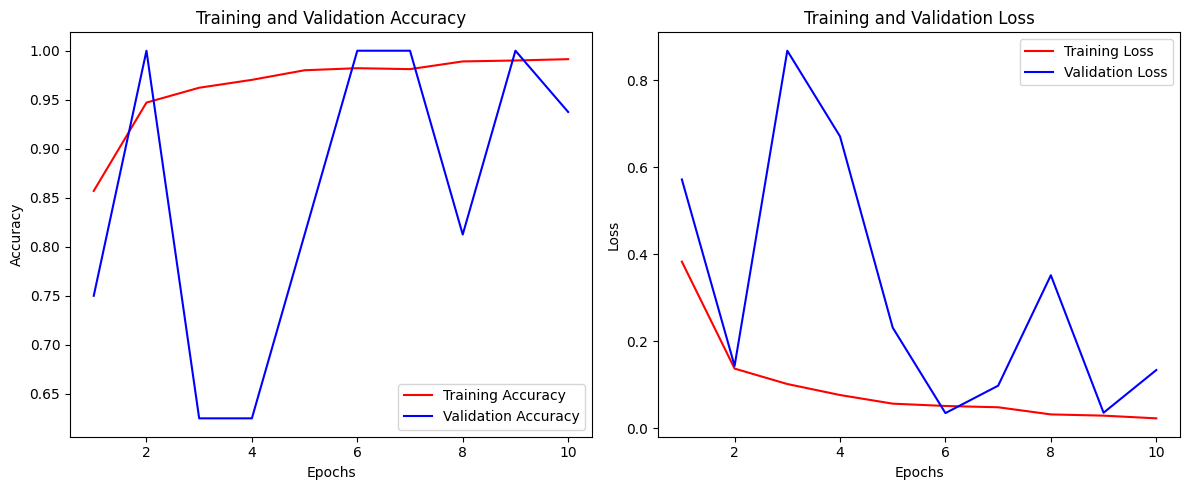

In [14]:
# Assuming `training_history` is the output of your model's fit method
epochs = [i for i in range(1, 11)]

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(epochs, training_history.history['loss'], color='red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], color='blue', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()